<a href="https://colab.research.google.com/github/crystalreine/58089_PrelimPS_Gutierrez/blob/main/58090_LabNo05_Wagler/58090_LabNo05_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Another vital activity of Machine Learning is Classification. In this module we are going to understand the concepts and applications of classification in machine learning. In this module, we are going to discuss:
* Linear Classification
* Logistic Regression

## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single variable classification using least squares or logistic regression. 

3. Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [114]:
class LRegression():
  def train(self,X,y):
    if len(X.shape) == 1: X = self._reshape_x(X)
    X = self._concatenate_ones(X)
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

  def predict(self):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    preds = log_model.predict(X)
    return preds

  def evaluate(self,X,y):
    class_metrics = {
    'accuracy': [metrics.accuracy_score(y, preds)],
    'precision': [metrics.precision_score(y, preds)],
    'recall': [metrics.recall_score(y,preds)],
    'f1-score': [metrics.f1_score(y, preds)]}
    dataf = pd.DataFrame(class_metrics)
    return dataf
  
  def visualize(self,X,y):
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X,y)
    preds = log_model.predict(X)
    plt.figure()
    plt.scatter(X,y, color='red')
    plt.scatter(X,preds, color='green')
    plt.grid()

    plt.figure()
    conf_mat = metrics.confusion_matrix(y, preds)
    sns.heatmap(conf_mat, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    return plt.show()

  #helper functions
  def _reshape_x(self,X):
    return X.reshape(-1,1)
    
  def _concatenate_ones(self, X):
    ones = np.ones(shape=X.shape[0]).reshape(-1,1)
    return np.concatenate((ones,X),1)

In [ ]:
df_admit = pd.read_csv('/content/drugDeaths_clean.csv').head(100)
X = df_admit['Age'].to_numpy().reshape((-1,1))
y = df_admit['DateType'].to_numpy().reshape((-1,1))

In [ ]:
classification = LRegression()

In [113]:
classification.train(X,y)

In [ ]:
classification.predict()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


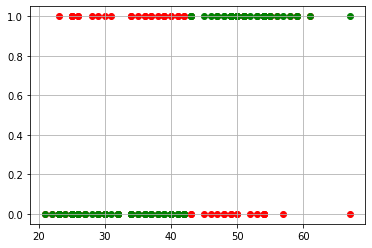

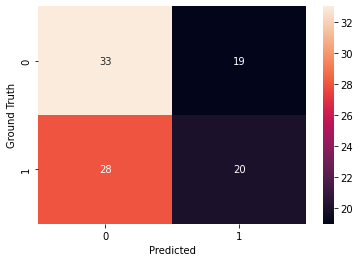

In [ ]:
classification.visualize(X,y)

In [ ]:
classification.evaluate(X,y)

,accuracy,precision,recall,f1-score
0,0.53,0.512821,0.416667,0.45977
